Ailerons are small hinged sections on the outboard portion of a wing used to control the roll of an airplane. In this project, we are going to design a controller to manage the ailerons of an aircraft based on supervised learning.

![Aileron](https://www.eecg.utoronto.ca/~hadizade/APS1070/p3Ar.jpg)




The following dataset contains 13750 instances, where each instance is a set of 40 features describing the airplane's status. Our goal is to use these features to predict the `Goal` column, which is a command that our controller should issue. We will make our predictions by implementing linear regression.

In [1]:
import pandas as pd
import numpy as np

df=pd.read_csv("https://raw.githubusercontent.com/aps1070-2019/datasets/master/F16L.csv" , skipinitialspace=True)

In [2]:
### Print the Data

df.head(3)

,inputs ClimbRate,Sgz,P,Q,CurPitch,CurRoll,AbsRoll,DiffClb,DiffRollRate,DiffDiffClb,...,DiffSeTime8,DiffSeTime9,DiffSeTime10,DiffSeTime11,DiffSeTime12,DiffSeTime13,DiffSeTime14,Alpha,Se,Goal
0,-17,-6,-0.03,0.14,0.59,-0.5,-11,-9,0.015,-0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.021,-0.0008
1,-791,15,-0.28,-0.34,1.11,0.9,-10,27,-0.002,4.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.013,-0.0009
2,-46,48,-0.42,0.07,0.57,0.6,-5,-8,-0.008,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.019,-0.0005


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X= df.drop('Goal', axis =1)

#Train_Test_Val Split
y = df['Goal']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1)

In [4]:
scaler = StandardScaler().fit(X_train)

In [5]:
X_train = scaler.transform(X_train)
X_train = pd.DataFrame(X_train, columns=df.drop(["Goal"],axis=1).columns)
X_train.insert(loc=0, column='Ones', value=np.ones(len(X_train)))
X_train.head(3)

,Ones,inputs ClimbRate,Sgz,P,Q,CurPitch,CurRoll,AbsRoll,DiffClb,DiffRollRate,...,DiffSeTime7,DiffSeTime8,DiffSeTime9,DiffSeTime10,DiffSeTime11,DiffSeTime12,DiffSeTime13,DiffSeTime14,Alpha,Se
0,1.0,-0.361085,-0.905784,-0.119488,-0.940131,-0.095678,0.859111,0.979557,0.668783,0.155395,...,0.157864,0.0,0.160883,0.00344,0.159051,0.012816,0.158532,0.011771,-0.628786,-0.721327
1,1.0,-0.994936,-1.369858,-1.799868,1.163469,1.079630,0.034484,-1.679894,-0.483242,0.381453,...,0.157864,0.0,0.160883,0.00344,-2.981186,0.012816,-4.747804,0.011771,0.392746,0.577952
2,1.0,-1.125547,0.177055,-0.613717,-0.098691,0.603154,-0.583985,0.254252,-0.963252,-0.899543,...,0.157864,0.0,0.160883,0.00344,0.159051,0.012816,0.158532,0.011771,-0.118020,-0.288234


In [6]:
X_val = scaler.transform(X_val)
X_val = pd.DataFrame(X_val, columns=df.drop(["Goal"],axis=1).columns)
X_val.insert(loc=0, column='Ones', value=np.ones(len(X_val)))
X_val.head(3)

,Ones,inputs ClimbRate,Sgz,P,Q,CurPitch,CurRoll,AbsRoll,DiffClb,DiffRollRate,...,DiffSeTime7,DiffSeTime8,DiffSeTime9,DiffSeTime10,DiffSeTime11,DiffSeTime12,DiffSeTime13,DiffSeTime14,Alpha,Se
0,1.0,-1.064083,-0.403037,0.803074,2.173197,0.889040,0.240641,-1.921662,-2.211278,-1.954480,...,0.157864,0.0,-3.109433,0.00344,-2.981186,0.012816,-4.747804,0.011771,0.392746,0.289224
1,1.0,-0.180534,1.839987,0.407690,0.826893,-0.063913,-1.717847,0.979557,-1.251258,0.908922,...,-3.404721,0.0,0.160883,0.00344,0.159051,0.012816,0.158532,0.011771,-0.118020,-0.288234
2,1.0,1.152472,-0.712420,-1.206793,-0.351123,-1.239221,-2.336317,-1.438125,0.860787,2.868091,...,0.157864,0.0,0.160883,0.00344,0.159051,0.012816,0.158532,0.011771,-0.628786,-0.721327


In [7]:
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns=df.drop(["Goal"],axis=1).columns)
X_test.insert(loc=0, column='Ones', value=np.ones(len(X_test)))
X_test.head(3)

,Ones,inputs ClimbRate,Sgz,P,Q,CurPitch,CurRoll,AbsRoll,DiffClb,DiffRollRate,...,DiffSeTime7,DiffSeTime8,DiffSeTime9,DiffSeTime10,DiffSeTime11,DiffSeTime12,DiffSeTime13,DiffSeTime14,Alpha,Se
0,1.0,-0.011507,0.177055,-0.416026,-0.182835,-0.286269,-1.717847,-0.229284,0.380776,-0.598132,...,0.157864,0.0,0.160883,0.00344,0.159051,0.012816,0.158532,0.011771,-0.628786,-0.432598
1,1.0,1.390646,1.491932,-0.745512,1.247613,-1.270987,-1.820925,0.737789,-0.387240,0.682864,...,0.157864,0.0,0.160883,0.00344,0.159051,0.012816,0.158532,0.011771,-0.628786,-0.288234
2,1.0,-0.895056,-0.480383,-1.009101,-0.771843,0.317268,0.549876,0.254252,-0.003232,-0.221369,...,0.157864,0.0,0.160883,0.00344,0.159051,0.012816,0.158532,0.011771,-0.628786,-0.721327


## Part 2 - Linear Regression Using Direct Solution

In [8]:
from sklearn.metrics import mean_squared_error
import scipy
W = np.dot(scipy.linalg.inv(np.dot(X_train.T, X_train)), np.dot(X_train.T, y_train))

print('RMSE y_train: {}'.format(mean_squared_error(np.dot(X_train,W),y_train,squared = False)))
print('RMSE y_val: {}'.format(mean_squared_error(np.dot(X_val,W),y_val,squared = False)))
### YOUR CODE HERE ###

RMSE y_train: 0.00018038475755538538
RMSE y_val: 0.00018142645567518928


## Part 3 - Full Batch Gradient Descent

In [9]:
import time
start_time = time.time() ## Records current time

#initialize the parameters w, alpha
w = (np.random.uniform(0, 0.001, size=(41, 1))).reshape(1,-1)

alpha = 0.01

validation_RMSE_Direct = mean_squared_error(np.dot(X_val,W),y_val,squared = False)
CT = 1.001 * validation_RMSE_Direct

RMSE_train = []
RMSE_val = []

while True:
    y_train_pred= np.dot(X_train,w.T).reshape(-1,1)
    RMSE_train.append(mean_squared_error(y_train_pred,y_train,squared=False))
    
    y_val_pred= np.dot(X_val,w.T).reshape(-1,1)
    
    val_Err = mean_squared_error(y_val_pred,y_val,squared=False)
    RMSE_val.append(val_Err)
    
    if val_Err < CT:
        break
    
    gradient = (1/len(y_train_pred) * np.dot(X_train.T, y_train_pred-y_train.values.reshape(-1,1))).reshape(1,-1)
    w = w - alpha * gradient ### weight update

print("--- Total Training Time: %s (s) ---" % (time.time() - start_time))

--- Total Training Time: 3.444740056991577 (s) ---


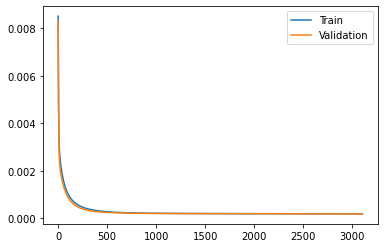

In [10]:
import matplotlib.pyplot as plt
plt.plot(RMSE_train, label = 'Train')
plt.plot(RMSE_val, label = 'Validation')
plt.legend()

plt.show()

***Comment*** No obvious over/underfitting is observed, the train and validation curve overlap mostly except the elbow where training curve is slightly higher, both Validation and Training RMSE drops rapidly around 250 epochs

## Part 4 - Mini-batch and Stochastic Gradient Descent

In [101]:
import time

def minibatchGD(X_train,X_val,y_train,y_val,CT,batch_size =32,lr = 0.01):

    start_time = time.time()
    X_train_copy = X_train.copy().values
    y_train_copy = y_train.copy().values.reshape(-1,1)
    indexs = np.arange(len(X_train))
    converged = True

    #initialize the parameters w, alpha
    w = (np.random.uniform(0, 0.001, size=(41, 1))).reshape(1,-1)

    num_batches = len(X_train)//batch_size

    if len(X_train)%batch_size != 0:
        last_batch = len(X_train)%batch_size
        num_batches =num_batches + 1

    alpha = lr

    RMSE_train = []
    RMSE_val = []
    Time = []
    e =1
    while True:
        randomized_index = np.random.permutation(indexs)
        X_train_copy  = X_train_copy[randomized_index]
        y_train_copy  = y_train_copy[randomized_index]
        
        if e>2:
            if RMSE_val[-1] > 1000*RMSE_val[0]:
                    print('bs= {}, not converged'.format(batch_size))
                    converged = False
                    break

        for i in range(num_batches):           
            mini_X_train = X_train_copy[i*batch_size:(i+1)*batch_size]
            mini_y_train = y_train_copy[i*batch_size:(i+1)*batch_size]

            y_train_pred= np.dot(mini_X_train,w.T).reshape(-1,1)

            gradient = (1/len(y_train_pred) * np.dot(mini_X_train.T, y_train_pred-mini_y_train)).reshape(1,-1)
            w = w - alpha * gradient ### weight update
        
        Time.append(time.time() - start_time)
        y_val_pred= np.dot(X_val,w.T).reshape(-1,1)
        
        val_Err = mean_squared_error(y_val_pred,y_val,squared=False)
        RMSE_val.append(mean_squared_error(y_val_pred,y_val,squared=False))
        RMSE_train.append(mean_squared_error(y_train_pred,mini_y_train,squared=False))
        e = e+1
        
        if val_Err < CT:
            break
            
    return w,RMSE_train,RMSE_val,Time,converged

    ## GD Script -- Sample code in tutorial! ##

    print("--- Total Training Time: %s (s) ---" % (time.time() - start_time))

In [106]:

validation_RMSE_Direct = mean_squared_error(np.dot(X_val,W),y_val,squared = False)
CT = 1.001 * validation_RMSE_Direct
batches=[2,32,64,128,256,512,2*512]
RMSE_train_list = []
RMSE_val_list = []
Times =[]
converged_b = []
summed_time = []
for b in batches:
    w,RMSE_train,RMSE_val,Time,converged = minibatchGD(X_train,X_val,y_train,y_val,CT,batch_size = b,lr = 0.01)
    if converged:
        RMSE_train_list.append(RMSE_train)
        RMSE_val_list.append(RMSE_val)
        Times.append(Time)
        converged_b.append(b)
        summed_time.append(sum(Time))
    

bs= 2, not converged
bs= 32, not converged


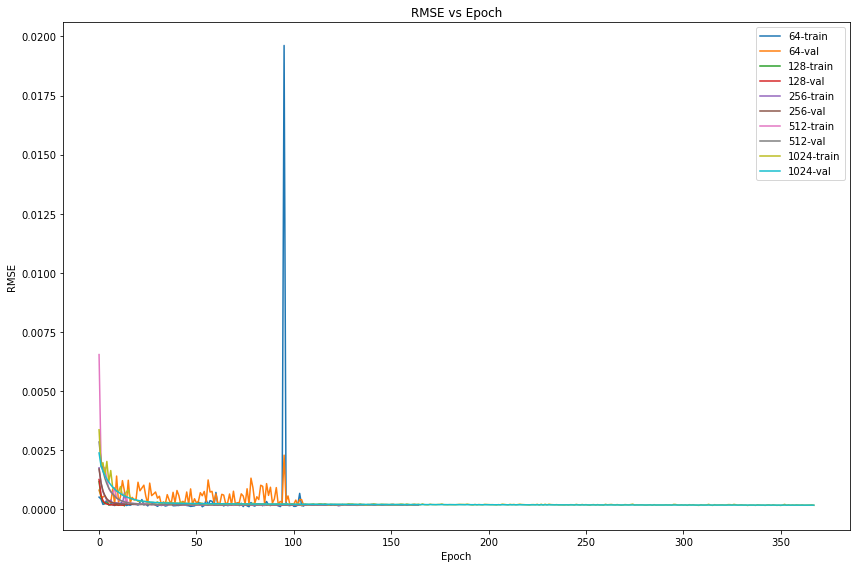

In [107]:
for i in range(len(RMSE_train_list)):
    plt.plot(RMSE_train_list[i],label = str(converged_b[i])+'-train')
    plt.plot(RMSE_val_list[i],label = str(converged_b[i])+'-val')
plt.legend()
#plt.xlim([0,200])
plt.title('RMSE vs Epoch')
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.tight_layout(rect=[0,0,2,2])
plt.show()

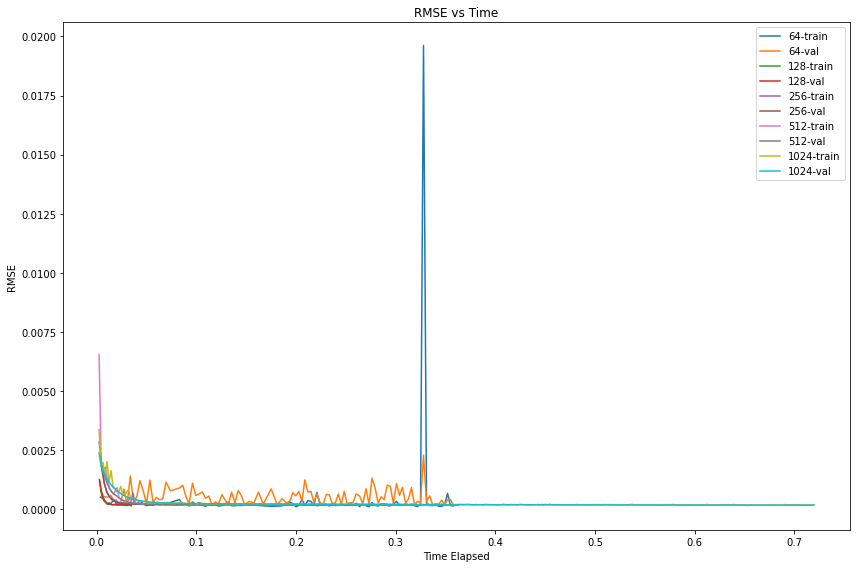

In [109]:
for i in range(len(RMSE_train_list)):
    plt.plot(Times[i],RMSE_train_list[i],label = str(converged_b[i])+'-train')
    plt.plot(Times[i],RMSE_val_list[i],label = str(converged_b[i])+'-val')
plt.legend()
#plt.xlim([0,200])
plt.title('RMSE vs Time')
plt.ylabel('RMSE')
plt.xlabel('Time Elapsed')
plt.tight_layout(rect=[0,0,2,2])
plt.show()

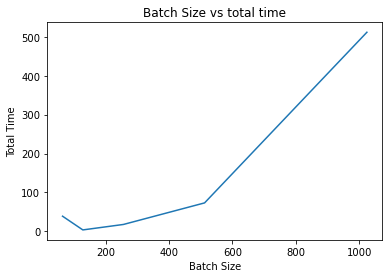

In [83]:
plt.plot(converged_b,summed_time)

plt.title('Batch Size vs total time')
plt.xlabel('Batch Size')
plt.ylabel('Total Time')
plt.show()

***Findings***

From the first plot I can see that both batch size of 2 and 32 failed to converge, only begin from 64 the minibatch algorithm starts to converge. Also, when the batch is small, there is an increase of noise in the RMSE, because small batches or SGD gives much higher variation than full batch.

From the second plot we can clearly see that batch size of 1024 has the longest tail, and the size of 512 has the second longest tail. We can infer that it takes longer for large batch size to converge when the error is very small, on the contrary, we can see that batch size of 64 is much shorter but much more fluctuations. They apply the same as the first plot, the size of 1024 has the longest tail of epochs.

From the thrid plot it shows a general trend that as the batch size increases, the training time also increases


## Part 5 - Introducing Momentum



In [84]:
import time

def minibatchGD_with_momentum(X_train,X_val,y_train,y_val,CT,batch_size =32,lr = 0.01, beta = 0):

    start_time = time.time()
    X_train_copy = X_train.copy().values
    y_train_copy = y_train.copy().values.reshape(-1,1)
    indexs = np.arange(len(X_train))
    converged = True
    g = np.zeros([1,41])
    #initialize the parameters w, alpha
    w = (np.random.uniform(0, 0.001, size=(41, 1))).reshape(1,-1)

    num_batches = len(X_train)//batch_size

    if len(X_train)%batch_size != 0:
        last_batch = len(X_train)%batch_size
        num_batches =num_batches + 1

    alpha = lr

    RMSE_train = []
    RMSE_val = []
    Time = []
    e =1
    while True:

        randomized_index = np.random.permutation(indexs)
        X_train_copy  = X_train_copy[randomized_index]
        y_train_copy  = y_train_copy[randomized_index]
        
        if e>2:
            if RMSE_val[-1] > 1000*RMSE_val[0]:
                    print('not converged')
                    converged = False
                    break

        for i in range(num_batches):           
            mini_X_train = X_train_copy[i*batch_size:(i+1)*batch_size]
            mini_y_train = y_train_copy[i*batch_size:(i+1)*batch_size]

            y_train_pred= np.dot(mini_X_train,w.T).reshape(-1,1)

            gradient = (1/len(y_train_pred) * np.dot(mini_X_train.T, y_train_pred-mini_y_train)).reshape(1,-1)
 
            g = beta*g + (1-beta)*gradient 

            w = w - alpha * g ### weight update

            
        Time.append(time.time() - start_time)
        y_val_pred= np.dot(X_val,w.T).reshape(-1,1)
        
        val_Err = mean_squared_error(y_val_pred,y_val,squared=False)
        RMSE_val.append(mean_squared_error(y_val_pred,y_val,squared=False))
        RMSE_train.append(mean_squared_error(y_train_pred,mini_y_train,squared=False))
        e = e+1
        
        if val_Err < CT:
            break
            
    return w,RMSE_train,RMSE_val,Time,converged

    ## GD Script -- Sample code in tutorial! ##

    print("--- Total Training Time: %s (s) ---" % (time.time() - start_time))

In [85]:
betas =  np.arange(0.1,1,0.1)
RMSE_train_list = []
RMSE_val_list_momentum = []
Times =[]
converged_beta = []
summed_time_momentum = []
for beta in betas:
    w,RMSE_train,RMSE_val,Time,converged = minibatchGD_with_momentum(X_train,X_val,y_train,
                                                                     y_val,CT,batch_size = 128,lr = 0.01,beta=beta)
    if converged:
        RMSE_train_list.append(RMSE_train)
        RMSE_val_list_momentum.append(RMSE_val)
        Times.append(Time)
        converged_beta.append(beta)
        summed_time_momentum.append(sum(Time))

Because the color pattern will repeat so I split the results into half and plot separately

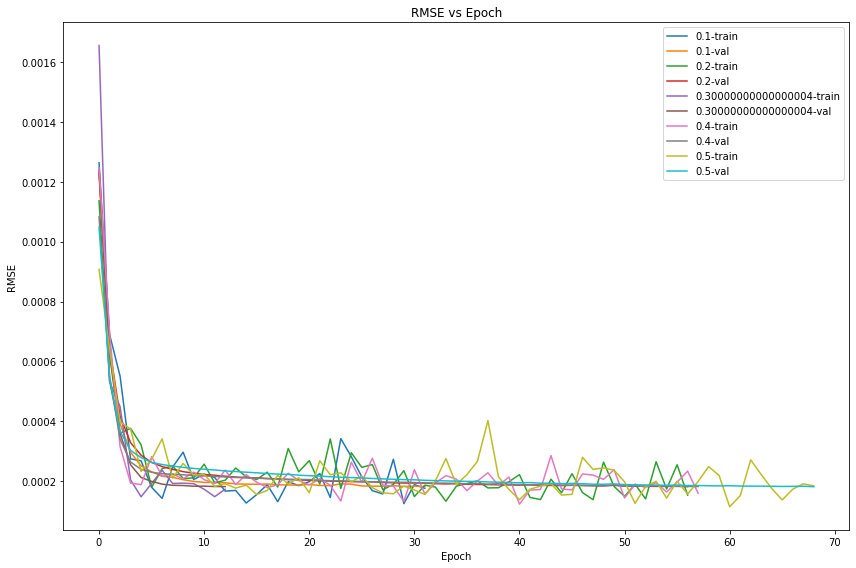

In [75]:
for i in range(len(RMSE_train_list)):
    if i <5:
        plt.plot(RMSE_train_list[i],label = str(converged_beta[i])+'-train')
        plt.plot(RMSE_val_list_momentum[i],label = str(converged_beta[i])+'-val')
plt.legend()
#plt.xlim([0,200])
plt.title('RMSE vs Epoch')
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.tight_layout(rect=[0,0,2,2])
plt.show()

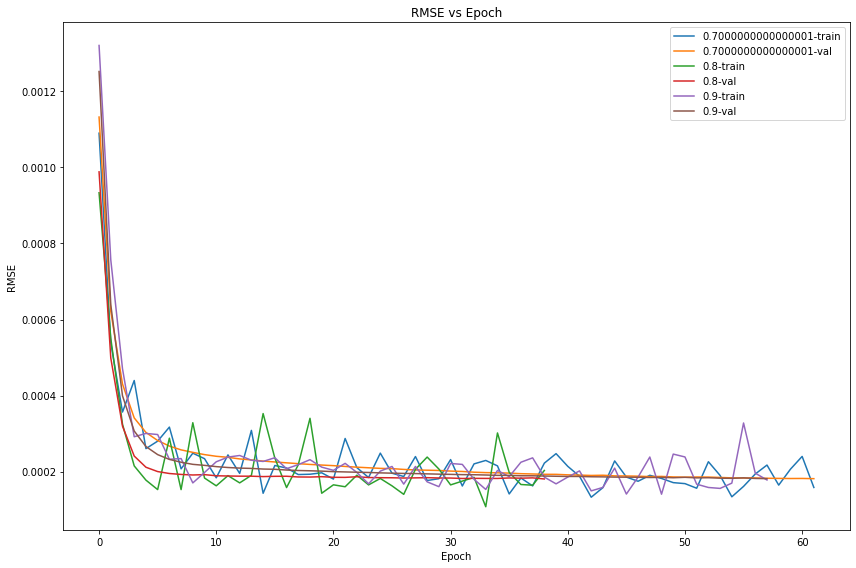

In [76]:
for i in range(len(RMSE_train_list)):
    if 5<i:
        plt.plot(RMSE_train_list[i],label = str(converged_beta[i])+'-train')
        plt.plot(RMSE_val_list_momentum[i],label = str(converged_beta[i])+'-val')
plt.legend()
#plt.xlim([0,200])
plt.title('RMSE vs Epoch')
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.tight_layout(rect=[0,0,2,2])
plt.show()

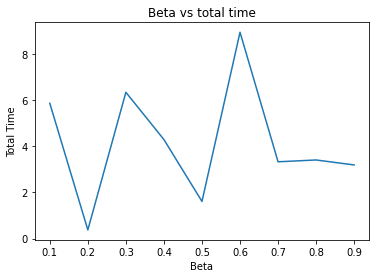

In [77]:
plt.plot(converged_beta,summed_time)

plt.title('Beta vs total time')
plt.xlabel('Beta')
plt.ylabel('Total Time')
plt.show()

In [86]:
print('when not using momentum, the number of epoch is {}'.format(len(RMSE_val_list[1])))
for i in range(len(converged_beta)):
    print('when using momentum with beta= {0}, the number of epoch is {1}'.format(converged_beta[i],len(RMSE_val_list_momentum[i])))

when not using momentum, the number of epoch is 55
when using momentum with beta= 0.1, the number of epoch is 64
when using momentum with beta= 0.2, the number of epoch is 82
when using momentum with beta= 0.30000000000000004, the number of epoch is 51
when using momentum with beta= 0.4, the number of epoch is 38
when using momentum with beta= 0.5, the number of epoch is 60
when using momentum with beta= 0.6, the number of epoch is 87
when using momentum with beta= 0.7000000000000001, the number of epoch is 84
when using momentum with beta= 0.8, the number of epoch is 58
when using momentum with beta= 0.9, the number of epoch is 53


In [88]:
print('when not using momentum, time elapsed is {}'.format(summed_time[1]))


for i in range(len(converged_beta)):
    print('when using momentum with beta= {0}, the time is {1}'.format(converged_beta[i],summed_time_momentum[i]))

when not using momentum, time elapsed is 3.8344695568084717
when using momentum with beta= 0.1, the time is 9.062421798706055
when using momentum with beta= 0.2, the time is 11.49919319152832
when using momentum with beta= 0.30000000000000004, the time is 4.04135799407959
when using momentum with beta= 0.4, the time is 2.2615559101104736
when using momentum with beta= 0.5, the time is 6.0298731327056885
when using momentum with beta= 0.6, the time is 12.663843393325806
when using momentum with beta= 0.7000000000000001, the time is 12.096778154373169
when using momentum with beta= 0.8, the time is 5.44122576713562
when using momentum with beta= 0.9, the time is 5.285798788070679


In [95]:
comparison = {}
comparison['Time'] = [summed_time[1],summed_time_momentum[3]] 
comparison['Num_Epochs'] = [len(RMSE_val_list[1]),len(RMSE_val_list_momentum[3])] 
comparison['beta'] = ['Nan',0.4]
pd.DataFrame(comparison, index=['Without Momentum',' With Momentum'])

,Time,Num_Epochs,beta
Without Momentum,3.834470,55,Nan
With Momentum,2.261556,38,0.4


***Summarize your experiments and comment on the effect of momentum***

The experiment is conducted using a batch size of 128 and a range of betas from 0.1 to 0.9 with a step of 0.1. 

Compared to cases when momentum is not used, using selected beta momentum will generally reduce the number of epochs used. At most it will reduce from 55 to 38(when beta = 0.4), moreover, using beta=0.4 momentum will also reduce the total time taken. So basically using momentum will help the model converge quicklier



## Part 6 - Finalizing a model 

***Model Selection:*** First Lets Check the Best Batch with lowest epoch to reach the CT in Part 4

In [96]:
lowest_epoch = float('inf')
for i in range(len(RMSE_val_list)):
    if len(RMSE_val_list[i]) < lowest_epoch:
        minimum__error = RMSE_val_list[i][-1]
        minimum_batch = converged_b[i]
        lowest_epoch = len(RMSE_val_list[i])
print('Best Batch with lowest epoch is {0} and corresponding error is {1}, with an epoch of {2}'.format(minimum_batch,minimum__error,lowest_epoch))

Best Batch with lowest epoch is 128 and corresponding error is 0.0001814788243093627, with an epoch of 55


***Model Selection:*** 
1. From the plot above, we can see that 128 also has the lowest running time, so I choose the batch size as ***128*** and num_epochs as ***100***, since it already converges at 61 so I would like to give some additional epochs to see if the error goes down further
2. From part 5, it shows that when beta equals ***0.8*** the training time is the lowest,so beta is chosen to be ***0.8***

Now let's start training it

In [97]:
num_epochs = 100
batch_size = 128
beta = 0.8
lr = 0.01 


start_time = time.time()
X_train_copy = X_train.copy().values
y_train_copy = y_train.copy().values.reshape(-1,1)
indexs = np.arange(len(X_train))
g = np.zeros([1,41])
#initialize the parameters w, alpha
w = (np.random.uniform(0, 0.001, size=(41, 1))).reshape(1,-1)


num_batches = len(X_train)//batch_size
if len(X_train)%batch_size != 0:
    last_batch = len(X_train)%batch_size
    num_batches =num_batches + 1

alpha = lr

for i in range(num_epochs):
    
    randomized_index = np.random.permutation(indexs)
    X_train_copy  = X_train_copy[randomized_index]
    y_train_copy  = y_train_copy[randomized_index]
    
    for i in range(num_batches):           
        mini_X_train = X_train_copy[i*batch_size:(i+1)*batch_size]
        mini_y_train = y_train_copy[i*batch_size:(i+1)*batch_size]

        y_train_pred= np.dot(mini_X_train,w.T).reshape(-1,1)

        gradient = (1/len(y_train_pred) * np.dot(mini_X_train.T, y_train_pred-mini_y_train)).reshape(1,-1)

        g = beta*g + (1-beta)*gradient 

        w = w - alpha * g ### weight update


In [98]:
y_val_pred= np.dot(X_val,w.T).reshape(-1,1)
val_Err = mean_squared_error(y_val_pred,y_val,squared=False)

print('Validation Error:' , val_Err)

Validation Error: 0.000175408756086445


In [99]:
y_test_pred= np.dot(X_test,w.T).reshape(-1,1)
test_Err = mean_squared_error(y_test_pred,y_test,squared=False)

print('Test Error:' , test_Err)

Test Error: 0.00017001543865536188
